In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [19]:
df = pd.read_csv(r"C:\Users\aclav\OneDrive\Desktop\CS368\data\data-progression\data.csv", header=0)
df.head()

,play_id,game_id,desc,play_type,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,...,td_prob,ep,epa,wp,def_wp,wpa,fourth_down_converted,fourth_down_failed,field_goal_attempt,punt_attempt
0,46,2009091000,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,kickoff,home,30.0,900.0,1800.0,3600.0,Half1,...,0.313676,0.323526,2.014474,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,(14:53) B.Roethlisberger pass short left to H....,pass,home,58.0,893.0,1793.0,3593.0,Half1,...,0.423011,2.338000,0.077907,0.546433,0.453567,0.004655,0.0,0.0,0.0,0.0
2,92,2009091000,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,home,53.0,856.0,1756.0,3556.0,Half1,...,0.421478,2.415907,-1.402760,0.551088,0.448912,-0.040295,0.0,0.0,0.0,0.0
3,113,2009091000,(13:35) (Shotgun) B.Roethlisberger pass incomp...,pass,home,56.0,815.0,1715.0,3515.0,Half1,...,0.318621,1.013147,-1.712583,0.510793,0.489207,-0.049576,0.0,0.0,0.0,0.0
4,139,2009091000,(13:27) (Punt formation) D.Sepulveda punts 54 ...,punt,home,56.0,807.0,1707.0,3507.0,Half1,...,0.208111,-0.699436,2.097796,0.461217,0.538783,0.097712,0.0,0.0,0.0,1.0


In [20]:
df.shape

(449371, 36)

In [21]:
#dropping plays on downs 1-3
df.drop(df.index[df["down"] != 4], inplace = True)
df.shape

(39644, 36)

In [22]:
#dropping rows that are not relevant plays
df = df[df["play_type"].notna()] #end of quarter plays
df.drop(df.index[df["play_type"] == "qb_kneel"], inplace = True)
df.drop(df.index[df["play_type"] == "no_play"], inplace = True)
df.drop(df.index[df["play_type"] == "qb_spike"], inplace = True)
df.shape

(37621, 36)

In [23]:
df.columns

Index(['play_id', 'game_id', 'desc', 'play_type', 'posteam_type',
       'yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'drive', 'qtr', 'down',
       'goal_to_go', 'ydstogo', 'ydsnet', 'yards_gained', 'field_goal_result',
       'timeout', 'timeout_team', 'posteam_timeouts_remaining',
       'posteam_score', 'defteam_score', 'score_differential', 'no_score_prob',
       'fg_prob', 'td_prob', 'ep', 'epa', 'wp', 'def_wp', 'wpa',
       'fourth_down_converted', 'fourth_down_failed', 'field_goal_attempt',
       'punt_attempt'],
      dtype='object')

In [24]:
#dropping unwanted columns
df.drop(df.columns[[0,1,2,10,12,16,17,18,19,32,33,34,35]], axis = 1, inplace = True)
df.shape

(37621, 23)

In [25]:
df.columns

Index(['play_type', 'posteam_type', 'yardline_100',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'qtr', 'goal_to_go', 'ydstogo',
       'ydsnet', 'posteam_timeouts_remaining', 'posteam_score',
       'defteam_score', 'score_differential', 'no_score_prob', 'fg_prob',
       'td_prob', 'ep', 'epa', 'wp', 'def_wp', 'wpa'],
      dtype='object')

In [26]:
df["play_type"].replace({"pass": "went", "run": "went", "punt": "kicked", "field_goal": "kicked"}, inplace = True)
df.shape

(37621, 23)

In [27]:
df = df.dropna()
df.shape

(37377, 23)

In [28]:
data = pd.get_dummies(df, columns =['play_type', 'posteam_type', 'game_half', 'qtr', 'posteam_timeouts_remaining'])

In [29]:
data

,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,goal_to_go,ydstogo,ydsnet,posteam_score,defteam_score,score_differential,...,game_half_Overtime,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,posteam_timeouts_remaining_0.0,posteam_timeouts_remaining_1.0,posteam_timeouts_remaining_2.0,posteam_timeouts_remaining_3.0
4,56.0,807.0,1707.0,3507.0,0.0,8,2,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
8,96.0,694.0,1594.0,3394.0,0.0,8,2,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
14,41.0,505.0,1405.0,3205.0,0.0,21,2,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
20,19.0,408.0,1308.0,3108.0,0.0,7,70,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
24,79.0,302.0,1202.0,3002.0,0.0,16,-6,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449301,85.0,702.0,1602.0,1602.0,0.0,12,-2,7.0,6.0,1.0,...,0,0,0,1,0,0,0,0,0,1
449310,53.0,463.0,1363.0,1363.0,0.0,8,23,6.0,7.0,-1.0,...,0,0,0,1,0,0,0,0,1,0
449341,58.0,536.0,536.0,536.0,0.0,16,16,7.0,12.0,-5.0,...,0,0,0,0,1,0,0,0,0,1
449355,14.0,150.0,150.0,150.0,0.0,1,64,12.0,7.0,5.0,...,0,0,0,0,1,0,0,1,0,0


In [30]:
data.columns

Index(['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'goal_to_go', 'ydstogo', 'ydsnet',
       'posteam_score', 'defteam_score', 'score_differential', 'no_score_prob',
       'fg_prob', 'td_prob', 'ep', 'epa', 'wp', 'def_wp', 'wpa',
       'play_type_kicked', 'play_type_went', 'posteam_type_away',
       'posteam_type_home', 'game_half_Half1', 'game_half_Half2',
       'game_half_Overtime', 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4', 'qtr_5',
       'posteam_timeouts_remaining_0.0', 'posteam_timeouts_remaining_1.0',
       'posteam_timeouts_remaining_2.0', 'posteam_timeouts_remaining_3.0'],
      dtype='object')

In [31]:
#dropped redundant Y column "play_type_kicked" at index 18
#dropped redundant columns "quarter_seconds_remaining" and "half_seconds_remaining" to avoid multicollinearity.
data.drop(labels=['play_type_kicked', 'quarter_seconds_remaining', 'half_seconds_remaining', 'ep', 'epa'], axis=1, inplace = True)
data.head()

,yardline_100,game_seconds_remaining,goal_to_go,ydstogo,ydsnet,posteam_score,defteam_score,score_differential,no_score_prob,fg_prob,...,game_half_Overtime,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,posteam_timeouts_remaining_0.0,posteam_timeouts_remaining_1.0,posteam_timeouts_remaining_2.0,posteam_timeouts_remaining_3.0
4,56.0,3507.0,0.0,8,2,0.0,0.0,0.0,0.001861,0.244603,...,0,1,0,0,0,0,0,0,0,1
8,96.0,3394.0,0.0,8,2,0.0,0.0,0.0,0.003023,0.023641,...,0,1,0,0,0,0,0,0,0,1
14,41.0,3205.0,0.0,21,2,0.0,0.0,0.0,0.004547,0.501696,...,0,1,0,0,0,0,0,0,0,1
20,19.0,3108.0,0.0,7,70,0.0,0.0,0.0,0.001197,0.895016,...,0,1,0,0,0,0,0,0,0,1
24,79.0,3002.0,0.0,16,-6,0.0,0.0,0.0,0.015674,0.077646,...,0,1,0,0,0,0,0,0,0,1


In [32]:
data.shape

(37377, 29)

In [33]:
data.columns

Index(['yardline_100', 'game_seconds_remaining', 'goal_to_go', 'ydstogo',
       'ydsnet', 'posteam_score', 'defteam_score', 'score_differential',
       'no_score_prob', 'fg_prob', 'td_prob', 'wp', 'def_wp', 'wpa',
       'play_type_went', 'posteam_type_away', 'posteam_type_home',
       'game_half_Half1', 'game_half_Half2', 'game_half_Overtime', 'qtr_1',
       'qtr_2', 'qtr_3', 'qtr_4', 'qtr_5', 'posteam_timeouts_remaining_0.0',
       'posteam_timeouts_remaining_1.0', 'posteam_timeouts_remaining_2.0',
       'posteam_timeouts_remaining_3.0'],
      dtype='object')

In [34]:
#move Y to front of table
targ = data['play_type_went']
data.drop(labels=['play_type_went'], axis=1, inplace = True)
data.insert(0, 'play_type_went', targ)
data.columns

Index(['play_type_went', 'yardline_100', 'game_seconds_remaining',
       'goal_to_go', 'ydstogo', 'ydsnet', 'posteam_score', 'defteam_score',
       'score_differential', 'no_score_prob', 'fg_prob', 'td_prob', 'wp',
       'def_wp', 'wpa', 'posteam_type_away', 'posteam_type_home',
       'game_half_Half1', 'game_half_Half2', 'game_half_Overtime', 'qtr_1',
       'qtr_2', 'qtr_3', 'qtr_4', 'qtr_5', 'posteam_timeouts_remaining_0.0',
       'posteam_timeouts_remaining_1.0', 'posteam_timeouts_remaining_2.0',
       'posteam_timeouts_remaining_3.0'],
      dtype='object')

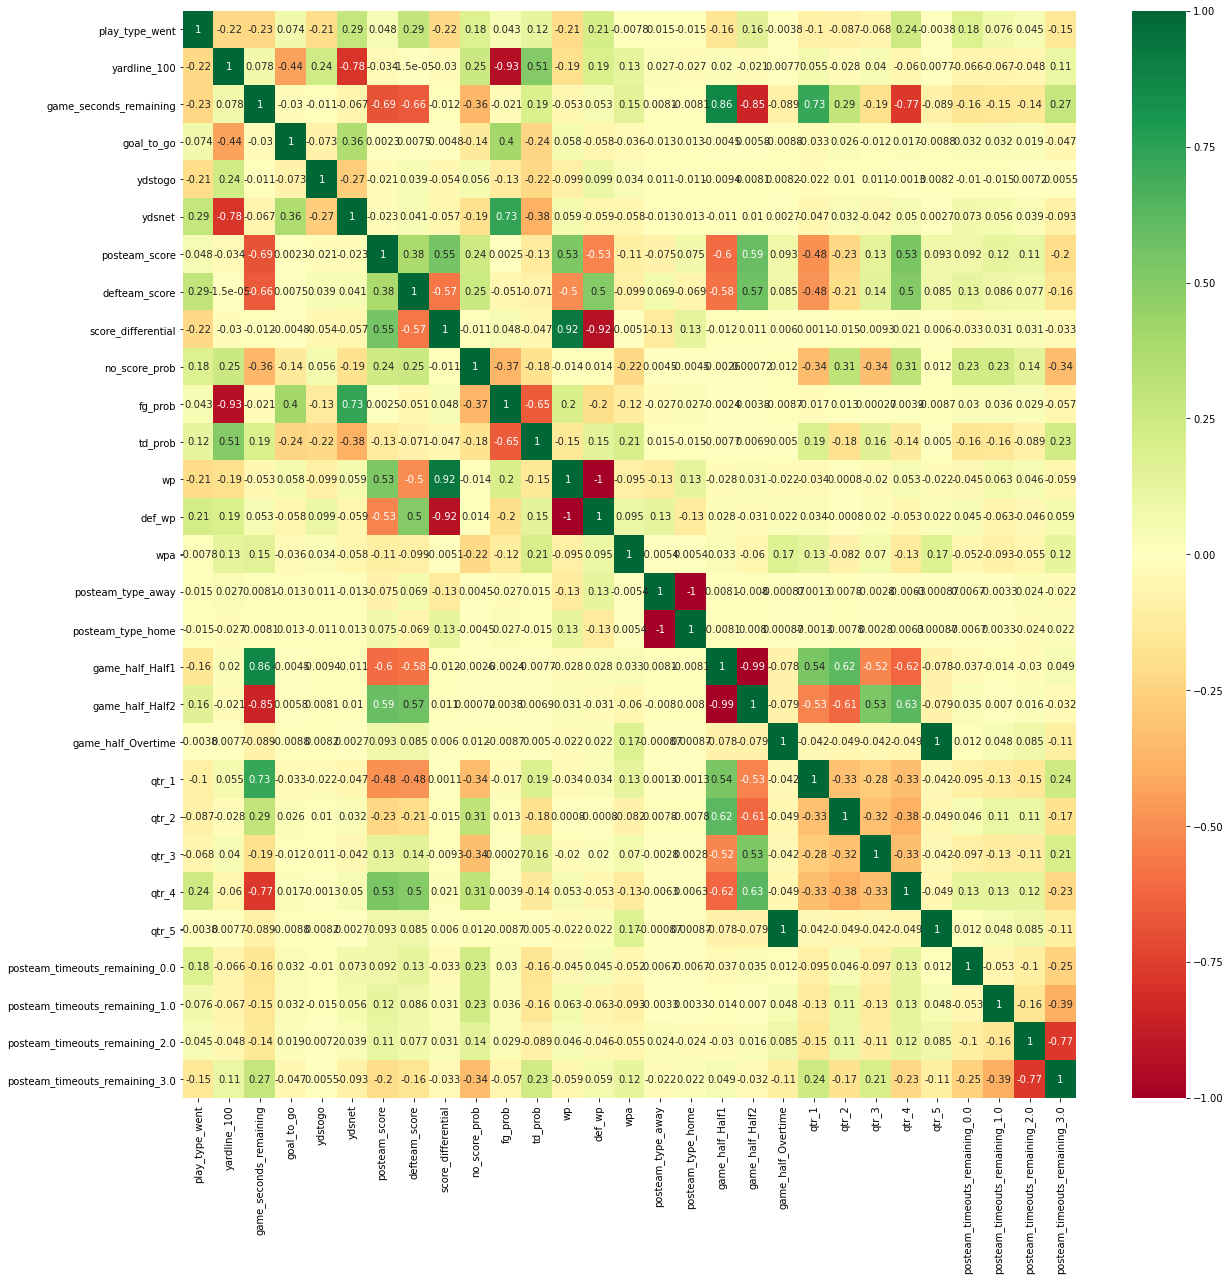

In [35]:
#correlation matrix
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
plot = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [36]:
#eliminating redundant columns wp, game_half_Half1, game_half_Half2, and game_half_overtime
data.drop(labels=['def_wp', 'game_half_Half1', 'game_half_Half2', 'game_half_Overtime'], axis=1, inplace = True)
data.head()

,play_type_went,yardline_100,game_seconds_remaining,goal_to_go,ydstogo,ydsnet,posteam_score,defteam_score,score_differential,no_score_prob,...,posteam_type_home,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,posteam_timeouts_remaining_0.0,posteam_timeouts_remaining_1.0,posteam_timeouts_remaining_2.0,posteam_timeouts_remaining_3.0
4,0,56.0,3507.0,0.0,8,2,0.0,0.0,0.0,0.001861,...,1,1,0,0,0,0,0,0,0,1
8,0,96.0,3394.0,0.0,8,2,0.0,0.0,0.0,0.003023,...,0,1,0,0,0,0,0,0,0,1
14,0,41.0,3205.0,0.0,21,2,0.0,0.0,0.0,0.004547,...,1,1,0,0,0,0,0,0,0,1
20,0,19.0,3108.0,0.0,7,70,0.0,0.0,0.0,0.001197,...,0,1,0,0,0,0,0,0,0,1
24,0,79.0,3002.0,0.0,16,-6,0.0,0.0,0.0,0.015674,...,1,1,0,0,0,0,0,0,0,1


In [37]:
#Y attribute is now at index 0
#grab columns 1-32, X is the feature array
X = data.iloc[:,1:]
X.columns

Index(['yardline_100', 'game_seconds_remaining', 'goal_to_go', 'ydstogo',
       'ydsnet', 'posteam_score', 'defteam_score', 'score_differential',
       'no_score_prob', 'fg_prob', 'td_prob', 'wp', 'wpa', 'posteam_type_away',
       'posteam_type_home', 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4', 'qtr_5',
       'posteam_timeouts_remaining_0.0', 'posteam_timeouts_remaining_1.0',
       'posteam_timeouts_remaining_2.0', 'posteam_timeouts_remaining_3.0'],
      dtype='object')

In [38]:
X.head()

,yardline_100,game_seconds_remaining,goal_to_go,ydstogo,ydsnet,posteam_score,defteam_score,score_differential,no_score_prob,fg_prob,...,posteam_type_home,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,posteam_timeouts_remaining_0.0,posteam_timeouts_remaining_1.0,posteam_timeouts_remaining_2.0,posteam_timeouts_remaining_3.0
4,56.0,3507.0,0.0,8,2,0.0,0.0,0.0,0.001861,0.244603,...,1,1,0,0,0,0,0,0,0,1
8,96.0,3394.0,0.0,8,2,0.0,0.0,0.0,0.003023,0.023641,...,0,1,0,0,0,0,0,0,0,1
14,41.0,3205.0,0.0,21,2,0.0,0.0,0.0,0.004547,0.501696,...,1,1,0,0,0,0,0,0,0,1
20,19.0,3108.0,0.0,7,70,0.0,0.0,0.0,0.001197,0.895016,...,0,1,0,0,0,0,0,0,0,1
24,79.0,3002.0,0.0,16,-6,0.0,0.0,0.0,0.015674,0.077646,...,1,1,0,0,0,0,0,0,0,1


In [39]:
#making output array for dependent var
Y = data.iloc[:,0]
Y.head()

4     0
8     0
14    0
20    0
24    0
Name: play_type_went, dtype: uint8

In [40]:
X.shape

(37377, 24)

In [41]:
Y.shape

(37377,)

In [42]:
#Univariate selection - scoring best attributes
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
bestfeatures = SelectKBest(score_func=f_classif, k=24)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 15 best features

                             Specs        Score
6                    defteam_score  3436.191539
4                           ydsnet  3350.287771
18                           qtr_4  2334.754878
1           game_seconds_remaining  2112.573880
0                     yardline_100  1978.869548
7               score_differential  1899.891932
11                              wp  1798.618291
3                          ydstogo  1740.271925
20  posteam_timeouts_remaining_0.0  1238.926234
8                    no_score_prob  1221.888147
23  posteam_timeouts_remaining_3.0   860.851087
10                         td_prob   522.958799
15                           qtr_1   384.236406
16                           qtr_2   286.970809
21  posteam_timeouts_remaining_1.0   217.955604
2                       goal_to_go   208.584533
17                           qtr_3   171.839073
5                    posteam_score    85.185034
22  posteam_timeouts_remaining_2.0    76.919492
9                          fg_prob    69

[0.10885827 0.05552413 0.01136293 0.07004991 0.08804179 0.02371999
 0.04246177 0.0475768  0.05863575 0.09756632 0.12933946 0.09086966
 0.07139506 0.00660526 0.00670513 0.00293494 0.00775057 0.00420943
 0.03397967 0.00081933 0.01858306 0.00503097 0.00726185 0.01071796]


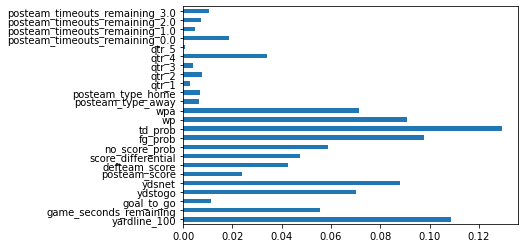

In [43]:
#visualizing above discoveries with extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()


In [44]:
#data is now split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=0)
classifier = LogisticRegression(solver='lbfgs', max_iter=4500, random_state=0)
classifier.fit(X_train, Y_train)
predicted_y = classifier.predict(X_test)

In [45]:
#building classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=4500, random_state=0)

In [46]:
#train model
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=4500, random_state=0)

In [47]:
#testing logistic regression: predicting test data
predicted_y = classifier.predict(X_test)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=0)
classifier = LogisticRegression(solver='lbfgs', max_iter=4500, random_state=0)
classifier.fit(X_train, Y_train)
predicted_y = classifier.predict(X_test)

print("records predicted positive: \n")
count=0
for x in range(len(predicted_y)):
   if (predicted_y[x] == 1):
      count = count + 1
      print(x, end="\t")
print("\n\ntotal predicted positive out of 12334: ")
print(count)

records predicted positive: 

7	37	40	42	66	78	87	91	101	111	124	186	212	220	221	229	269	276	299	315	320	321	352	362	375	402	416	418	419	458	466	476	483	490	514	515	544	568	574	582	608	613	631	635	657	658	661	662	663	667	668	670	672	679	681	685	687	697	701	716	735	739	740	747	748	768	783	793	797	801	811	834	858	866	874	878	883	886	894	932	933	935	940	961	970	973	991	1003	1034	1042	1043	1059	1084	1087	1105	1108	1112	1121	1143	1151	1153	1192	1197	1204	1205	1213	1221	1224	1258	1262	1267	1268	1277	1285	1286	1294	1298	1309	1312	1344	1347	1352	1355	1358	1359	1366	1367	1370	1372	1376	1379	1411	1415	1425	1430	1433	1437	1438	1445	1449	1452	1463	1468	1469	1471	1473	1476	1523	1551	1555	1566	1574	1591	1598	1599	1602	1603	1609	1612	1616	1625	1634	1640	1644	1648	1650	1658	1659	1673	1681	1682	1696	1698	1701	1726	1730	1742	1745	1764	1783	1795	1802	1809	1812	1815	1837	1838	1849	1852	1856	1862	1867	1872	1881	1883	1907	1913	1926	1951	1955	1961	1974	1977	1993	2003	2020	2029	2044	2109	2135	2138	2146	2150	2

In [49]:
#making predictions for the confusion matrix
predictions = classifier.predict(X_test)

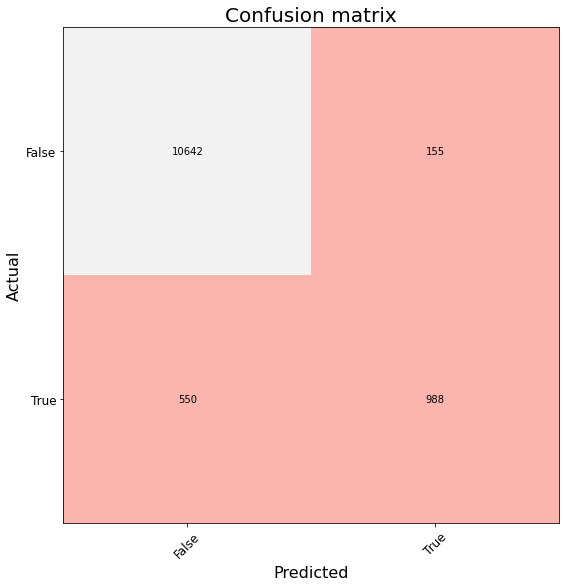

In [55]:
#confusion matrix
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 20)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["False", "True"], rotation=45, size = 12)
plt.yticks(tick_marks, ["False", "True"], size = 12)
plt.tight_layout()
plt.ylabel('Actual', size = 16)
plt.xlabel('Predicted', size = 16)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')


In [51]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.94


In [53]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10797
           1       0.86      0.64      0.74      1538

    accuracy                           0.94     12335
   macro avg       0.91      0.81      0.85     12335
weighted avg       0.94      0.94      0.94     12335



In [36]:
#calculate roc and auc
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

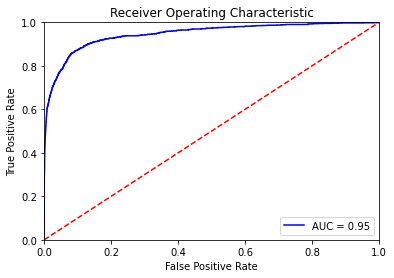

In [37]:
#plot roc and auc
#https://stackoverflow.com/a/38467407
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
print(classifier.coef_, classifier.intercept_)

[[-2.04705506e-01  1.42257516e-03 -1.76682322e+00 -6.01731127e-02
   3.57350965e-02  2.90528760e-02  1.88862317e-03  2.71642528e-02
   4.71245329e+00 -1.11796839e+01  9.68248161e+00 -5.05061446e+00
   1.46020121e+00  1.99691859e+00  2.08417939e+00 -6.06270016e-01
  -9.70422484e-01  1.82267837e+00  3.25447883e+00  5.80633272e-01
   2.27960715e+00  8.55706890e-01  6.92565460e-01  2.53218484e-01]] [4.38304615]


In [39]:
X.columns

Index(['yardline_100', 'game_seconds_remaining', 'goal_to_go', 'ydstogo',
       'ydsnet', 'posteam_score', 'defteam_score', 'score_differential',
       'no_score_prob', 'fg_prob', 'td_prob', 'wp', 'wpa', 'posteam_type_away',
       'posteam_type_home', 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4', 'qtr_5',
       'posteam_timeouts_remaining_0.0', 'posteam_timeouts_remaining_1.0',
       'posteam_timeouts_remaining_2.0', 'posteam_timeouts_remaining_3.0'],
      dtype='object')